> Esse código foi executado no Google Colab, portanto alguns blocos de código são implementados específicamente para ser compatível com essa plataforma. Se for do seu interesse executar esse script, certifique-se de adaptar o código para o seu ambiente.

## Contexto

- Leilão é uma modalidade de negociação envolvendo diversos tipos de produtos, desde bens de consumo até artigos de luxo, sendo mediado pela figura do leiloeiro. O processo inicia com um lance mínimo inicial, e de forma crescente, vai subindo os valores à medida que cresce o número de lances.

- Os leilões ocorrem seguindo um objetivo, que seria o processo de transferência de bens com problemas de registros, pagamentos de impostos ou financiamento, para pessoas que buscam economizar. Importante ter em mente que um leilão não caracteriza uma venda direta de bens, e sim, uma licitação homologada (o direito sob a mercadoria leiloada é definida de acordo com o edital do leilão).

- Por fim, usualmente têm-se a segmentação de dois tipos de leilões, que diferem quanto a supervisão do sistema judiciário: leilão extrajudicial, organizado por instituições públicas e privadas para a venda de seus ativos, sem supervisão; e leilão judicial, organizados sob a supervisão do sistema judiciário para transferência de bens penhorados ou apreendidos.

## Importando Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Configurações do ambiente Colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Configuração de visualização do Matplotlib
mpl.style.use("seaborn-v0_8-deep")
mpl.rcParams["figure.figsize"] = (20, 5)
mpl.rcParams["figure.dpi"] = 100

In [6]:
# Importando os dados armazenados em arquivos csv no Google Drive
lances = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FCCD/lances.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FCCD/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FCCD/test.csv")

## Explorando os dados

In [7]:
print(f"Lances: {lances.shape}")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Lances: (7656334, 9)
Train: (1409, 4)
Test: (604, 3)


In [8]:
lances.head()

,id_lance,id_participante,leilao,mercadoria,dispositivo,tempo,pais,ip,url
0,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,artigos esportivos,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is
1,2351202,29c103503e1d6ace5626fb07a5ab0dafrtjvs,wpee4,joias,phone412,9631916842105263,Rússia,63.82.37.102,via8q041tf3xrke
2,2351201,0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,b6zck,móveis,phone99,9631916842105263,lt,181.144.42.116,vasstdc27m7nks3
3,2351200,6e178db6d17d21aa88aaca5bf15c2761lc500,jqx39,joias,phone99,9631916842105263,sa,174.12.78.255,omwhmwzvrn6ycq6
4,2351199,b7c4f67613c2af7e544f01359d4fccc7l5f7y,du967,equipamentos de escritório,phone348,9631916842105263,tr,21.10.208.37,vasstdc27m7nks3


In [9]:
lances.isnull().sum()

id_lance              0
id_participante       0
leilao                0
mercadoria            0
dispositivo           0
tempo                 0
pais               8859
ip                    0
url                   0
dtype: int64

In [10]:
lances.duplicated().sum()

0

- Temos registro de mais de 7.5 milhões de lances
- Não existem lances repetidos, mas temos cerca de 9000 lances sem informação de país
- Algumas colunas aparentam ter algum tipo de "criptografia", com letras e números misturados, provavelmente para proteger as informações dos usuários.
- A coluna `tempo` possui um padrão diferente, envolvendo somente números. Portanto, vamos assumir que a ordem e a escala relativa do tempo foi mantida.
- A coluna `pais` possui valores por extenso e abreviações, a seguir vamos tratar isso e criar uma nova coluna com todos os países escritos por extenso.

In [11]:
train.head()

,id_participante,conta_pagamento,endereco,resultado
0,6713e820273f591bdff7d26a48ee30c5k4iii,a3d2de7675556553a5f08e4c88d2c228x2qy8,a3d2de7675556553a5f08e4c88d2c228tfgez,0
1,84a773b3c9d300834d9d57af5dc83091y54cx,bb25506fc19d0fb3e5b64cb6ac946a8abfltp,b4154a40d0edd76b39d00d171bddab392i5ke,0
2,5c2b3f221cdf303df86ff1ffd7106fcco6pml,a3d2de7675556553a5f08e4c88d2c228viws4,a3d2de7675556553a5f08e4c88d2c228pdrbl,0
3,e2165ff862178c7b2946f7f62f5a3e51wcvaw,a95c11eb38e397299d0e81cb4a2e26edt0u44,34bb99a3d13f932948b49386538c80d0e4ed0,0
4,577af9ccdc29dcacbbce0f36b7c1ff15btljp,df9741a5fa05eea36db3b1211e80107dsw6ss,c8e927b259e03602a75c7901732a0d6fjw020,0


In [12]:
train["resultado"].value_counts(normalize=True)

resultado
0    0.950319
1    0.049681
Name: proportion, dtype: float64

In [13]:
test.head()

,id_participante,conta_pagamento,endereco
0,a71f84e476d03bd0b25d45e44eeed9a8efehw,a3d2de7675556553a5f08e4c88d2c228h98zm,a3d2de7675556553a5f08e4c88d2c228f0bvv
1,e134f2bb79d1a810aada6a24760c8910mh5na,a3d2de7675556553a5f08e4c88d2c2287j1ho,e350bda3ceb6067cad400ae931c3527aodbiw
2,069d020584a0e8c61e622321d4c43881j7pl3,a3d2de7675556553a5f08e4c88d2c22868czk,a3d2de7675556553a5f08e4c88d2c2286puek
3,120beb4523541f769a2b658cbc41dd57w7im7,f2516e617166921bae2862306434bbaf4suxz,a3d2de7675556553a5f08e4c88d2c228di8mu
4,54957cfd12ec8c64918b6200ea25d27fsc9hx,a3d2de7675556553a5f08e4c88d2c228d437s,6931155ed7bdbe4d1bebe49c6eb6b1c9ui5x2


- O conjunto de treino, com o rótulo de alguns usuários (humano e robô) é extremamente desbalanceado: somente cerca de **5%** dos usuários são robôs. Porém, esse tipo de situação é bem comum nesse cenário, visto que é natural supor que somente uma minoria de usuários serão infratores.
- Para a modelagem dos algoritmos preditivos de machine learning, teremos que tratar esse desbalanceamento.

In [14]:
# A seguir definimos um dicionário de mapeamento de siglas para nomes de países, que será usado para transformar a coluna `pais`
siglas_paises = {
    'cz': 'Republica Tcheca',
    'lt': 'Lituania',
    'sa': 'Arabia Saudita',
    'tr': 'Turquia',
    'my': 'Malasia',
    'Tailândia': 'Tailandia',
    'ke': 'Quenia',
    'vn': 'Vietna',
    'sg': 'Singapura',
    'ma': 'Marrocos',
    'India': 'India',
    'tz': 'Tanzania',
    'br': 'Brasil',
    'de': 'Alemanha',
    'Nigeria': 'Nigeria',
    'Africa do Sul': 'Africa do Sul',
    'no': 'Noruega',
    'gr': 'Grecia',
    'rs': 'Servia',
    'Estados Unidos': 'Estados Unidos',
    'kw': 'Kuwait',
    'Austrália': 'Australia',
    'Indonesia': 'Indonesia',
    'lk': 'Sri Lanka',
    'gh': 'Gana',
    'mx': 'Mexico',
    'uk': 'Reino Unido',
    'ir': 'Ira',
    'mu': 'Mauricio',
    'zm': 'Zambia',
    'hr': 'Croacia',
    'fr': 'Franca',
    'ar': 'Argentina',
    'hk': 'Hong Kong',
    'np': 'Nepal',
    'et': 'Etiopia',
    'ug': 'Uganda',
    'ro': 'Romenia',
    'ne': 'Niger',
    'Paraguai': 'Paraguai',
    'ca': 'Canada',
    'ua': 'Ucrania',
    'pk': 'Paquistao',
    'ae': 'Emirados Arabes Unidos',
    'ph': 'Filipinas',
    'hu': 'Hungria',
    'es': 'Espanha',
    'mw': 'Malawi',
    'bn': 'Brunei',
    'al': 'Albania',
    'dz': 'Argelia',
    'nz': 'Nova Zelandia',
    'mz': 'Mocambique',
    'eu': 'Uniao Europeia',
    'jo': 'Jordania',
    'tn': 'Tunisia',
    'bw': 'Botswana',
    'bj': 'Benin',
    'pe': 'Peru',
    'bd': 'Bangladesh',
    'gt': 'Guatemala',
    've': 'Venezuela',
    'ml': 'Mali',
    'ie': 'Irlanda',
    'bo': 'Bolivia',
    'sk': 'Eslovaquia',
    'zw': 'Zimbabue',
    'mg': 'Madagascar',
    'se': 'Suecia',
    'ly': 'Libia',
    'Sudão': 'Sudao',
    'az': 'Azerbaijao',
    'bf': 'Burkina Faso',
    'cm': 'Camaroes',
    'gq': 'Guine Equatorial',
    'jp': 'Japao',
    'ao': 'Angola',
    'pl': 'Polonia',
    'cn': 'China',
    'om': 'Oma',
    'ba': 'Bosnia e Herzegovina',
    'na': 'Namibia',
    'sn': 'Senegal',
    'sl': 'Serra Leoa',
    'eg': 'Egito',
    'pt': 'Portugal',
    'tw': 'Taiwan',
    'sz': 'Suazilandia',
    'ls': 'Lesoto',
    'iq': 'Iraque',
    'co': 'Colombia',
    'cl': 'Chile',
    'si': 'Eslovenia',
    'af': 'Afeganistao',
    'fi': 'Finlandia',
    'nl': 'Holanda',
    'qa': 'Catar',
    'at': 'Austria',
    'kr': 'Coreia do Sul',
    'it': 'Italia',
    'be': 'Belgica',
    'ec': 'Equador',
    'dj': 'Djibouti',
    'lr': 'Liberia',
    'gm': 'Gambia',
    'il': 'Israel',
    'am': 'Armenia',
    'rw': 'Ruanda',
    'td': 'Chade',
    'bg': 'Bulgaria',
    'mn': 'Mongolia',
    'mr': 'Mauritania',
    'uz': 'Uzbequistao',
    'ge': 'Georgia',
    'ch': 'Suica',
    'so': 'Somalia',
    'mk': 'Macedonia do Norte',
    'tm': 'Turcomenistao',
    'tg': 'Togo',
    'lu': 'Luxemburgo',
    'cv': 'Cabo Verde',
    'dk': 'Dinamarca',
    'lv': 'Letonia',
    'lb': 'Libano',
    'cr': 'Costa Rica',
    'sy': 'Siria',
    'la': 'Laos',
    'bh': 'Bahrein',
    'kh': 'Camboja',
    'cy': 'Chipre',
    'ci': 'Costa do Marfim',
    'uy': 'Uruguai',
    'ee': 'Estonia',
    'ye': 'Iemen',
    'me': 'Montenegro',
    'ga': 'Gabao',
    'mv': 'Maldivas',
    'pr': 'Porto Rico',
    'by': 'Bielorrussia',
    'mc': 'Monaco',
    'mm': 'Mianmar (Birmania)',
    'cg': 'Republica do Congo',
    'cf': 'Republica Centro-Africana',
    'sv': 'El Salvador',
    'md': 'Moldavia',
    'sc': 'Seychelles',
    'kz': 'Cazaquistao',
    'ht': 'Haiti',
    'tj': 'Tajiquistao',
    'sr': 'Suriname',
    'gu': 'Guiana',
    'fj': 'Fiji',
    'bi': 'Burundi',
    'mt': 'Malta',
    'cd': 'Republica Democratica do Congo',
    'hn': 'Honduras',
    'pa': 'Panama',
    'jm': 'Jamaica',
    'tt': 'Trinidad e Tobago',
    'kg': 'Quirguistao',
    'ad': 'Andorra',
    'bs': 'Bahamas',
    'ni': 'Nicaragua',
    'gy': 'Guiana',
    'mo': 'Macau',
    'is': 'Islandia',
    'ps': 'Palestina',
    'li': 'Liechtenstein',
    'aw': 'Aruba',
    'ws': 'Samoa',
    'do': 'Republica Dominicana',
    'bb': 'Barbados',
    're': 'Reuniao',
    'gb': 'Reino Unido',
    'bt': 'Butao',
    'vc': 'Sao Vicente e Granadinas',
    'gl': 'Groenlandia',
    'nc': 'Nova Caledonia',
    'je': 'Jersey',
    'dm': 'Dominica',
    'ag': 'Antigua e Barbuda',
    'sb': 'Ilhas Salomao',
    'pf': 'Polinesia Francesa',
    'vi': 'Ilhas Virgens Americanas',
    'bm': 'Bermudas',
    'bz': 'Belize',
    'pg': 'Papua-Nova Guine',
    'tl': 'Timor-Leste',
    'tc': 'Ilhas Turks e Caicos',
    'an': 'Antilhas Neerlandesas',
    'mp': 'Ilhas Marianas do Norte',
    'er': 'Eritreia',
    'fo': 'Ilhas Faroe',
    'gp': 'Guadalupe',
    'zz': 'Codigo desconhecido',
    'gn': 'Guine',
    'gi': 'Gibraltar',
    'mh': 'Ilhas Marshall'
}

In [15]:
def obter_nome_pais(sigla):
    return siglas_paises.get(sigla, sigla)

lances['pais_extenso'] = lances['pais'].apply(obter_nome_pais)
lances['pais_extenso'].fillna('Codigo desconhecido', inplace=True)

In [92]:
# Valores únicos em cada um dos datasets
unique_values_lances = lances["id_participante"].nunique()
unique_values_train = train["id_participante"].nunique()
unique_values_test = test["id_participante"].nunique()

# Participantes em comum entre o dataset de treino e teste com o de lances
common_values_train = set(lances["id_participante"]).intersection(set(train["id_participante"]))
common_values_test = set(lances["id_participante"]).intersection(set(test["id_participante"]))

count_common_values_train = len(common_values_train)
count_common_values_test = len(common_values_test)

print(f"Quantidade de valores únicos em lances: {unique_values_lances}")
print(f'Quantidade de valores em comum com train: {count_common_values_train} of {unique_values_train} ({(count_common_values_train / unique_values_train) * 100:.1f}%)')
print(f'Quantidade de valores em comum com test: {count_common_values_test} of {unique_values_test} ({(count_common_values_test / unique_values_test) * 100:.1f}%)')

Quantidade de valores únicos em lances: 6614
Quantidade de valores em comum com train: 1393 of 1409 (98.9%)
Quantidade de valores em comum com test: 591 of 604 (97.8%)


- Com base nos registros apresentados, existem 6614 usuários que realizaram lances.
- Alguns usuários estão presentes nas bases de treino e teste, mas não estão na base de lances.

In [17]:
# Juntando a base de lances com a base de treino para fazer uso dos rótulos e estudar a diferença comportamental entre humanos e robôs
joined_df = lances.merge(train, on='id_participante', how='inner')

In [18]:
print(f"Lances: {lances.shape}")
print(f"Joined: {joined_df.shape}")

Lances: (7656334, 10)
Joined: (2534325, 13)


In [19]:
joined_df.head()

,id_lance,id_participante,leilao,mercadoria,dispositivo,tempo,pais,ip,url,pais_extenso,conta_pagamento,endereco,resultado
0,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,artigos esportivos,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is,Republica Tcheca,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0
1,2351247,76218e14c379c12d599dae9e1c00b61a3i5b2,fwxlx,artigos esportivos,phone53,9631917052631578,lk,211.105.123.139,dxfwoh0cow9bre6,Sri Lanka,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0
2,2351264,76218e14c379c12d599dae9e1c00b61a3i5b2,9u5up,artigos esportivos,phone4,9631917105263157,ke,84.83.169.15,vasstdc27m7nks3,Quenia,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0
3,2351313,76218e14c379c12d599dae9e1c00b61a3i5b2,7us95,artigos esportivos,phone159,9631917315789473,et,204.38.26.113,jolczadwyrlkj95,Etiopia,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0
4,2351331,76218e14c379c12d599dae9e1c00b61a3i5b2,9u5up,artigos esportivos,phone4,9631917368421052,ke,177.14.78.147,vasstdc27m7nks3,Quenia,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0


In [21]:
leiloes_totais = joined_df["leilao"].count()
leiloes_unicos = joined_df["leilao"].nunique()
print(f"Total: {leiloes_totais}")
print(f"Únicos: {leiloes_unicos}")

Total: 2534325
Únicos: 12199


- Os mais de **2 milhões e meio** de lances correspondem a somente **12.199** leilões.

In [22]:
joined_df["resultado"].value_counts(normalize=True)

resultado
0    0.868448
1    0.131552
Name: proportion, dtype: float64

In [24]:
unique_robot_count = joined_df[joined_df['resultado'] == 1]['id_participante'].nunique()
unique_human_count = joined_df[joined_df['resultado'] == 0]['id_participante'].nunique()
unique_total = joined_df["id_participante"].nunique()

print(f"Porcentagem de fraude para usuários únicos")
print(f"Humanos: {unique_human_count} ({100*unique_human_count/unique_total:.2f}%)")
print(f"Robôs: {unique_robot_count} ({100*unique_robot_count/unique_total:.2f}%)")

Porcentagem de fraude para usuários únicos
Humanos: 1323 (94.97%)
Robôs: 70 (5.03%)


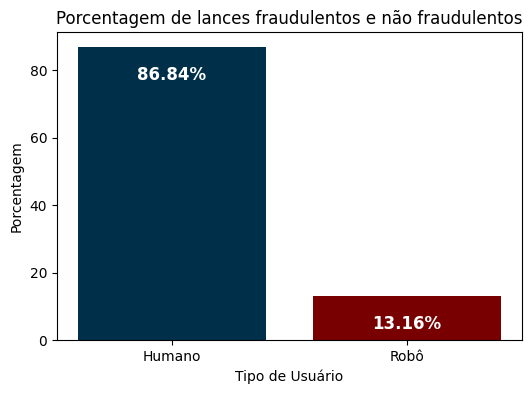

In [25]:
fraud = joined_df["resultado"].value_counts(normalize=True) * 100
labels = ['Humano', 'Robô']
percentages = [fraud[0], fraud[1]]

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, percentages, color=["#003049", "#780000"])

# Add text annotations
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate("{:.2f}%".format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -20),
                textcoords="offset points",
                ha="center", va="center",
                fontsize=12, color="white",
                fontweight="bold")

plt.xlabel('Tipo de Usuário')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de lances fraudulentos e não fraudulentos')
plt.show()

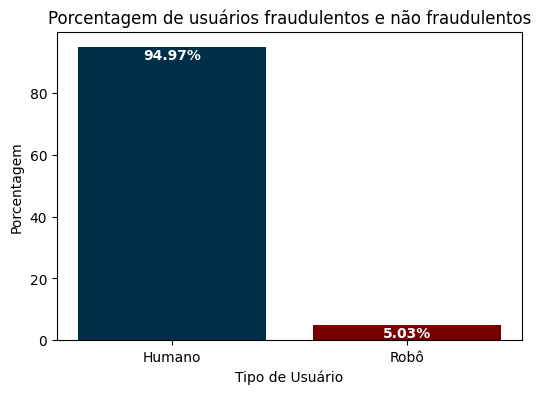

In [26]:
unique_robot_count = joined_df[joined_df['resultado'] == 1]['id_participante'].nunique()
unique_human_count = joined_df[joined_df['resultado'] == 0]['id_participante'].nunique()
unique_total = joined_df["id_participante"].nunique()

frauds = 100*unique_human_count/unique_total
non_frauds = 100*unique_robot_count/unique_total

labels = ['Humano', 'Robô']
percentages = [frauds, non_frauds]

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, percentages, color=["#003049", "#780000"])

# Add text annotations
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate("{:.2f}%".format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -6),
                textcoords="offset points",
                ha="center", va="center",
                fontsize=10, color="white",
                fontweight="bold")

plt.xlabel('Tipo de Usuário')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de usuários fraudulentos e não fraudulentos')
plt.show()

- Somente **5%** dos usuários são fraudadores, mas na base referente às movimentações de usuários rotulados, eles foram responsáveis por **13%** dos lances.

In [27]:
# Variáveis categóricas não criptografadas
categorical = ["pais_extenso", "dispositivo", "mercadoria"]

In [28]:
for feature in categorical:
    print(feature)
    print("_"*50)
    print(f"Temos {joined_df[feature].nunique()} valores únicos.")
    print(joined_df[feature].value_counts(normalize=True))
    print("\n")

pais_extenso
__________________________________________________
Temos 196 valores únicos.
pais_extenso
Índia                    1.798124e-01
Nigéria                  1.178874e-01
Indonésia                5.696231e-02
África do Sul            5.656970e-02
Quenia                   5.542935e-02
                             ...     
Antilhas Neerlandesas    3.945824e-07
Gibraltar                3.945824e-07
Guine                    3.945824e-07
Eritreia                 3.945824e-07
Ilhas Marshall           3.945824e-07
Name: proportion, Length: 196, dtype: float64


dispositivo
__________________________________________________
Temos 5393 valores únicos.
dispositivo
phone4       1.020804e-01
phone35      2.472572e-02
phone101     2.366429e-02
phone2       2.319947e-02
phone45      2.105097e-02
                 ...     
phone4575    3.945824e-07
phone7371    3.945824e-07
phone4312    3.945824e-07
phone6370    3.945824e-07
phone3971    3.945824e-07
Name: proportion, Length: 5393, dtype: floa

- São **196** países, **5393** dispositivos e **9** produtos.

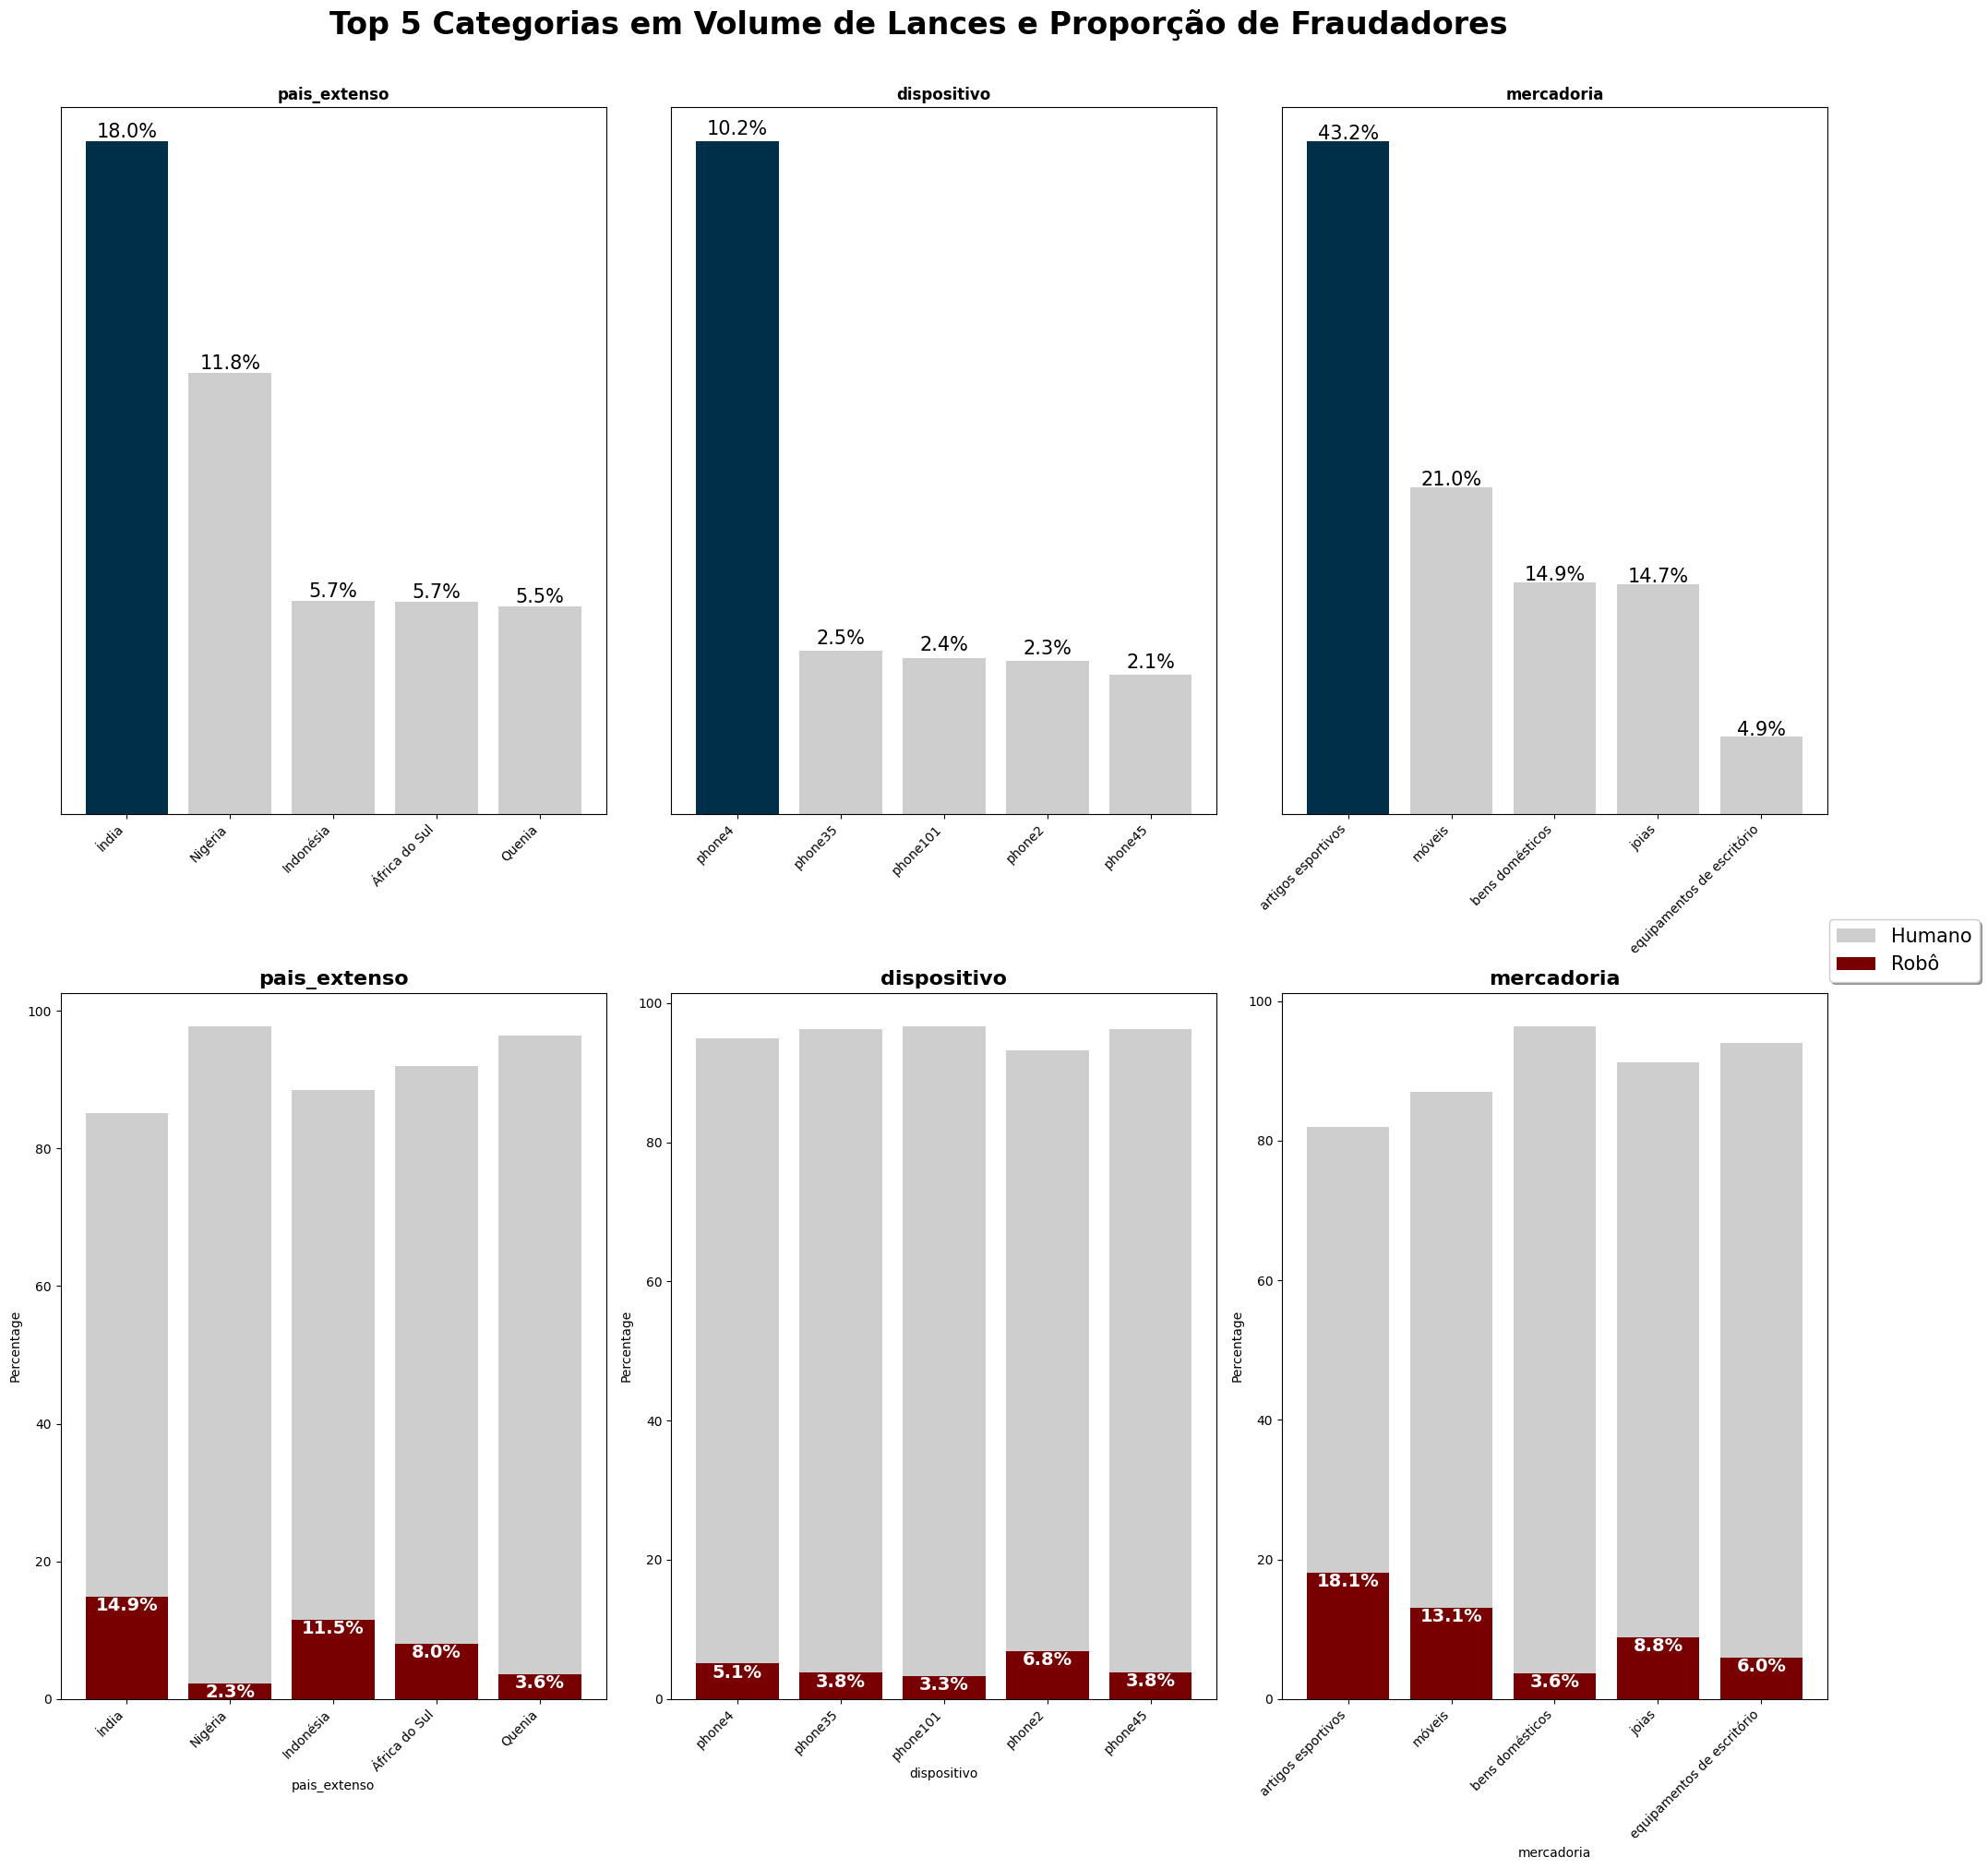

In [93]:
num_cols = len(categorical)
num_rows_per_plot = num_cols // 3 + (num_cols % 3 > 0)
total_rows = num_rows_per_plot * 2

fig, ax = plt.subplots(total_rows, 3, figsize=(20, 10 * 2))


if total_rows == 1:
    ax = ax.reshape(1, -1)

for i, feature in enumerate(categorical):
    row = i // 3
    col = i % 3

    grouped = joined_df[feature].value_counts(normalize=True)[0:5] * 100
    grouped = grouped.sort_values(ascending=False)

    ax[row, col].bar(x=range(len(grouped)), height=grouped.values, color='#cecece')
    max_value_index = grouped.values.argmax()
    ax[row, col].bar(x=max_value_index, height=grouped.values[max_value_index], color='#003049')

    ax[row, col].set_xticks(ticks=range(len(grouped)), labels=grouped.index.to_list())
    ax[row, col].set_title(feature, fontweight="bold")
    ax[row, col].get_yaxis().set_visible(False)
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha='right')

    for index, value in enumerate(grouped.values):
        ax[row, col].text(index, value + 0.1, f'{value:.1f}%', ha='center', fontsize=15)

handles = None
labels = None

for i, feature in enumerate(categorical):
    row = (i // 3) + num_rows_per_plot
    col = i % 3

    grouped = joined_df.groupby([feature, 'resultado']).size().unstack(fill_value=0)
    grouped['total_row'] = grouped.sum(axis=1)
    total_sum = grouped['total_row'].sum()
    grouped['percentage_of_total'] = (grouped['total_row'] / total_sum) * 100
    grouped['fraud_percentage'] = grouped[1] / grouped['total_row'] * 100
    grouped['non_fraud_percentage'] = grouped[0] / grouped['total_row'] * 100
    grouped.sort_values(by='total_row', ascending=False, inplace=True)
    grouped = grouped.iloc[0:5]

    bars2 = ax[row, col].bar(grouped.index, grouped['non_fraud_percentage'], color='#CECECE', label='Humano')
    bars1 = ax[row, col].bar(grouped.index, grouped['fraud_percentage'], color='#780000', label='Robô')

    if i == 0:
        handles, labels = ax[row, col].get_legend_handles_labels()

    ax[row, col].set_title(feature, fontweight="bold", fontsize=16)
    ax[row, col].set_ylabel("Percentage")
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha='right')

    for index, row_data in grouped.iterrows():
        ax[row, col].text(index, row_data['fraud_percentage'] - 2, f'{row_data["fraud_percentage"]:.1f}%', color='white', ha='center', fontsize=14, fontweight="bold")


fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5), fancybox=True, shadow=True, fontsize=15)

plt.suptitle("Top 5 Categorias em Volume de Lances e Proporção de Fraudadores", y=1.01, ha='center', fontsize=24, fontweight="bold")
plt.tight_layout()
plt.show()


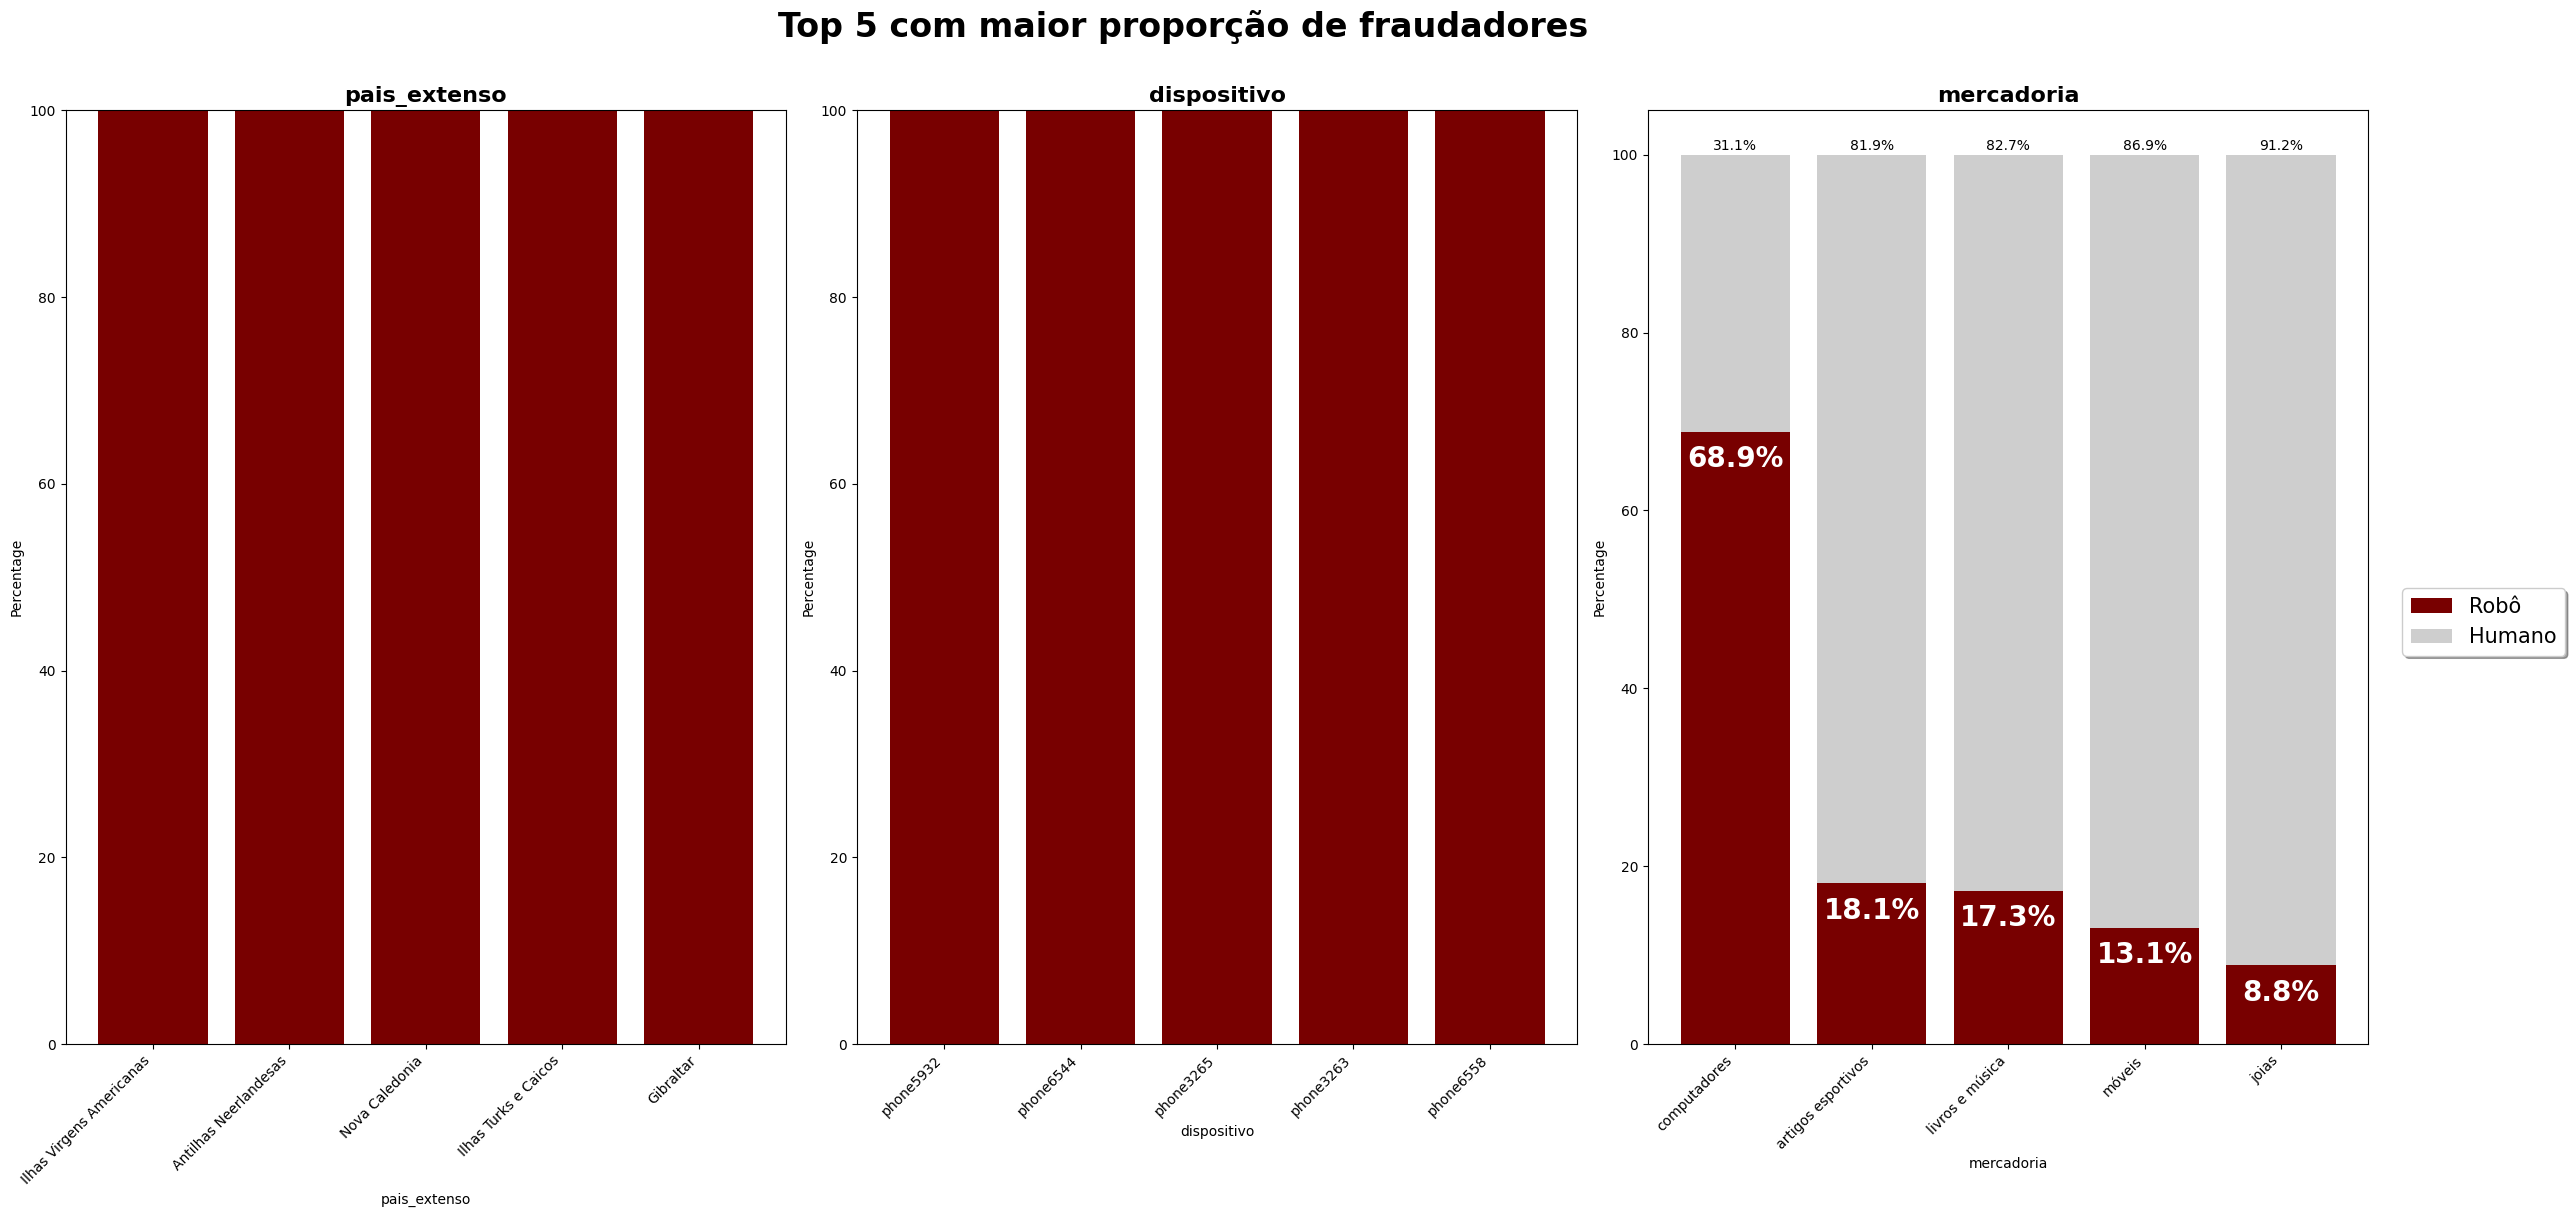

In [30]:
num_cols = len(categorical)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

fig, ax = plt.subplots(num_rows, 3, figsize=(24, 12))

if num_rows == 1:
    ax = ax.reshape(1, -1)

handles = None
labels = None

for i, feature in enumerate(categorical):
    row = i // 3
    col = i % 3

    grouped = joined_df.groupby([feature, 'resultado']).size().unstack(fill_value=0)
    grouped['total'] = grouped.sum(axis=1)
    grouped['fraud_percentage'] = grouped[1] / grouped['total'] * 100
    grouped['non_fraud_percentage'] = grouped[0] / grouped['total'] * 100
    grouped.sort_values(by='fraud_percentage', ascending=False, inplace=True)
    grouped = grouped.iloc[0:5]

    bars1 = ax[row, col].bar(grouped.index, grouped['fraud_percentage'], color='#780000', label='Robô')
    bars2 = ax[row, col].bar(grouped.index, grouped['non_fraud_percentage'], bottom=grouped['fraud_percentage'], color='#CECECE', label='Humano')

    if i == 0:
        handles, labels = ax[row, col].get_legend_handles_labels()

    ax[row, col].set_title(feature, fontweight="bold", fontsize=16)
    ax[row, col].set_ylabel("Percentage")
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha='right')

    for index, row_data in grouped.iterrows():
        if row_data['fraud_percentage'] != 100.0:
            ax[row, col].text(index, row_data['fraud_percentage'] - 4, f'{row_data["fraud_percentage"]:.1f}%', color='white', ha='center', fontsize=20, fontweight="bold")
            ax[row, col].text(index, row_data['fraud_percentage'] + row_data['non_fraud_percentage'] + 0.5, f'{row_data["non_fraud_percentage"]:.1f}%', ha='center', fontsize=10)

fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5), fancybox=True, shadow=True, fontsize=15)

plt.suptitle("Top 5 Maior Proporção de Fraudadores", y=1.01, ha='center', fontsize=24, fontweight="bold")
plt.tight_layout()
plt.show()


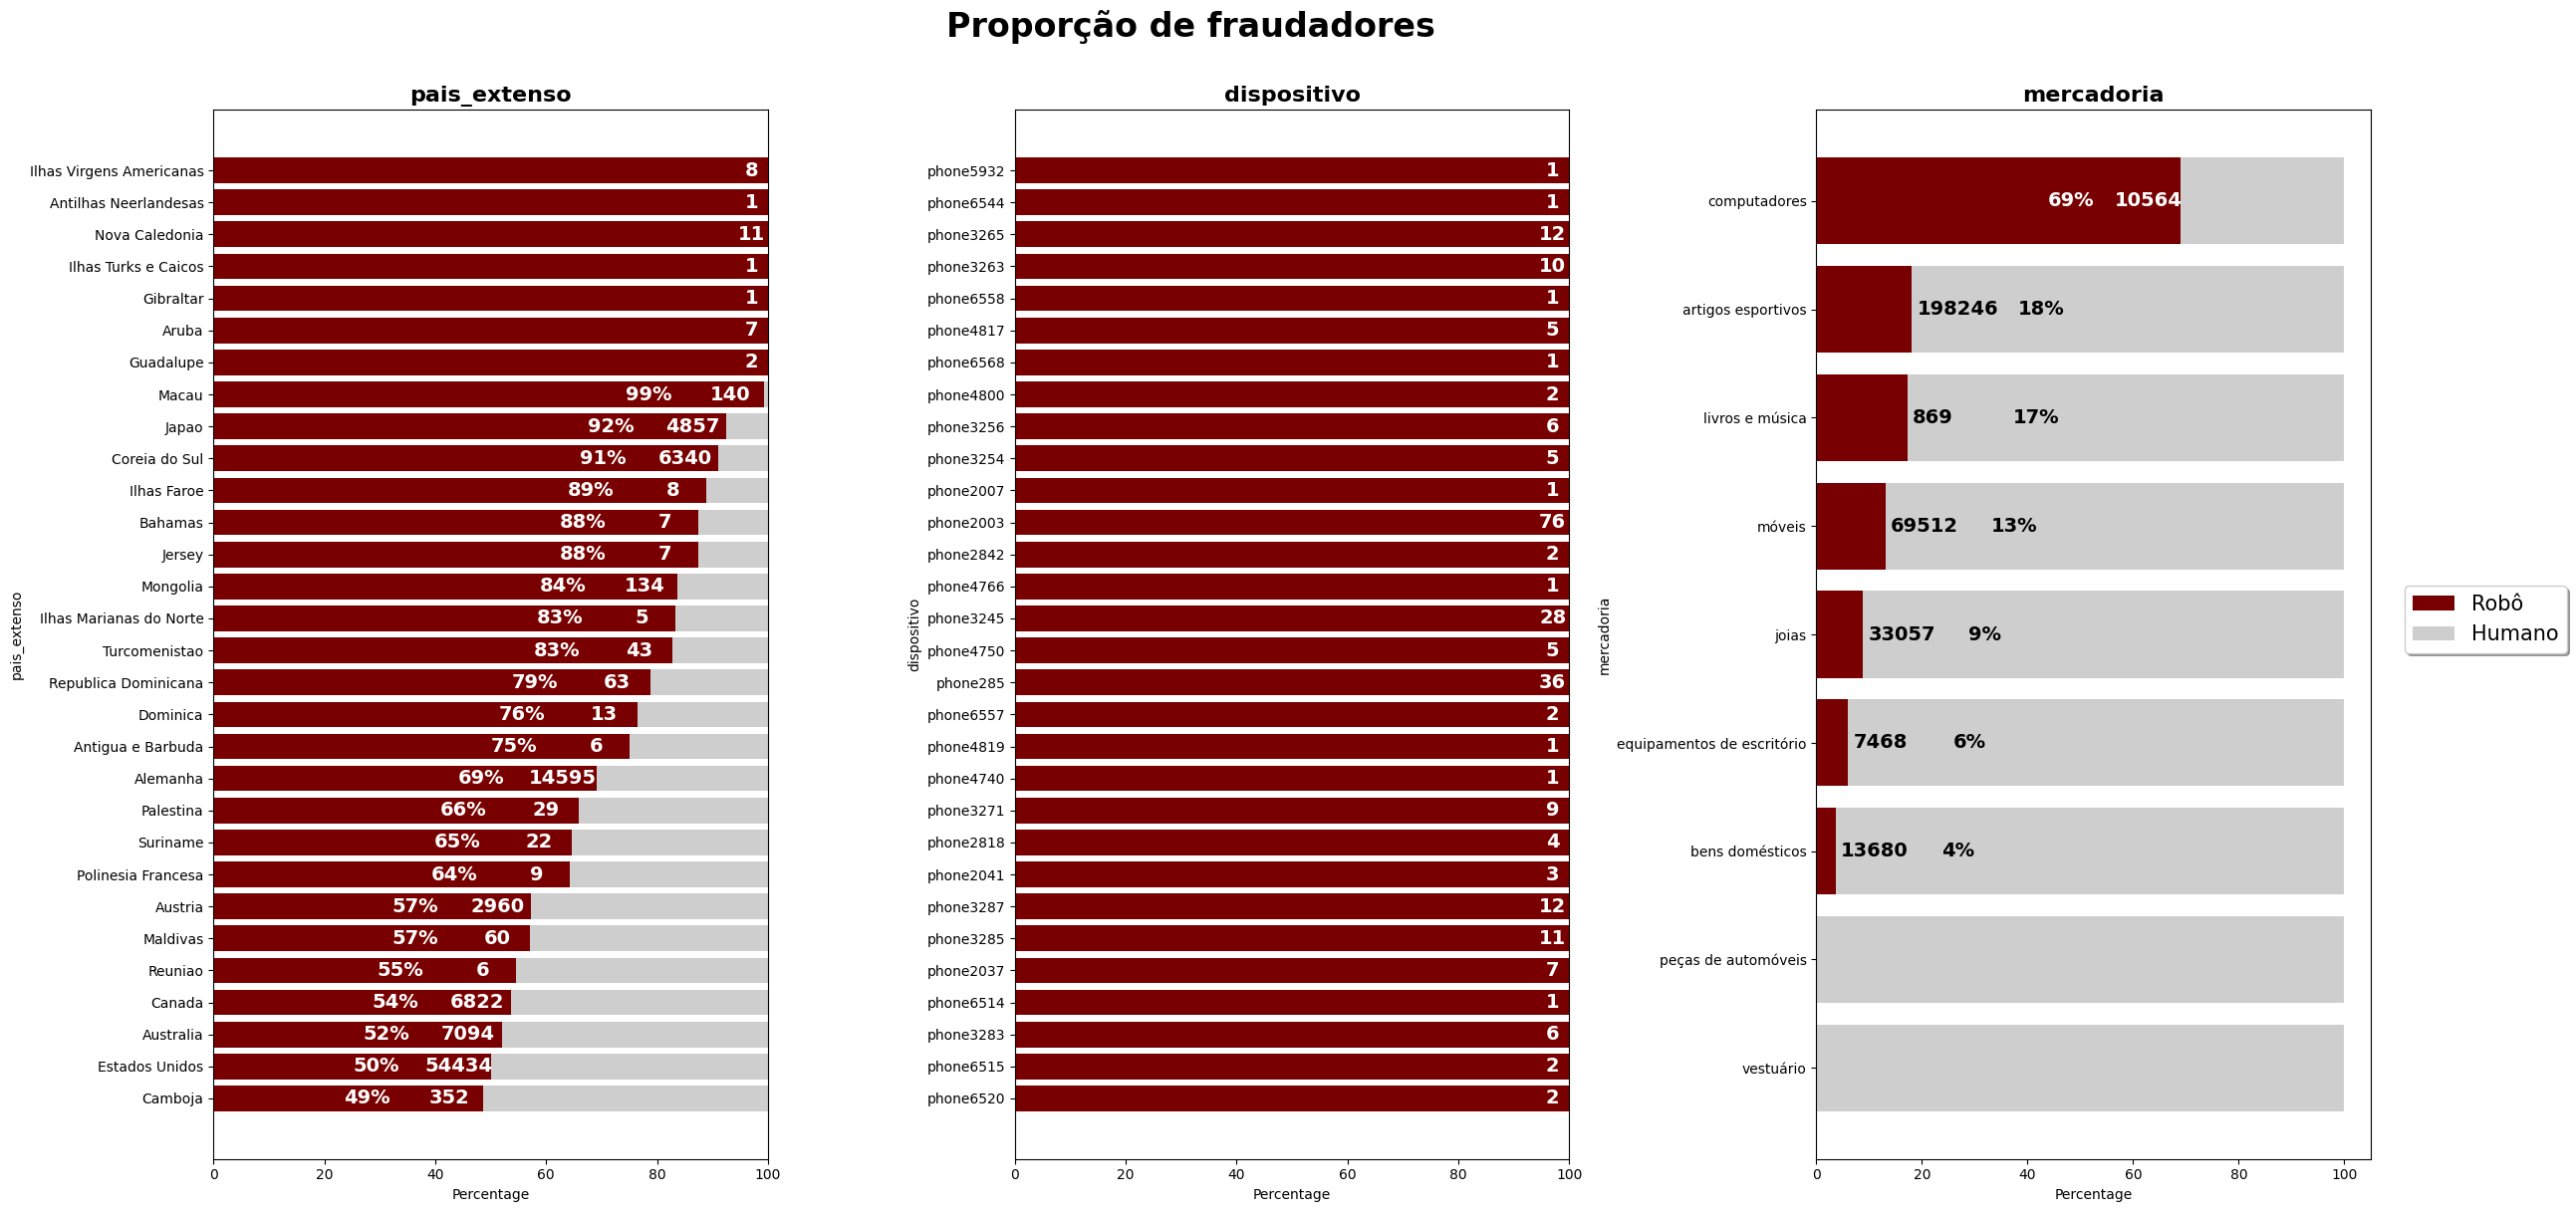

In [31]:
num_cols = len(categorical)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

fig, ax = plt.subplots(num_rows, 3, figsize=(24, 12))

if num_rows == 1:
    ax = ax.reshape(1, -1)

handles = None
labels = None

for i, feature in enumerate(categorical):
    row = i // 3
    col = i % 3

    grouped = joined_df.groupby([feature, 'resultado']).size().unstack(fill_value=0)
    grouped['total'] = grouped.sum(axis=1)
    grouped['fraud_percentage'] = grouped[1] / grouped['total'] * 100
    grouped['non_fraud_percentage'] = grouped[0] / grouped['total'] * 100
    grouped.sort_values(by='fraud_percentage', ascending=False, inplace=True)
    grouped = grouped.iloc[0:30]

    bars1 = ax[row, col].barh(grouped.index, grouped['fraud_percentage'], color='#780000', label='Robô')
    bars2 = ax[row, col].barh(grouped.index, grouped['non_fraud_percentage'], left=grouped['fraud_percentage'], color='#CECECE', label='Humano')

    if i == 0:
        handles, labels = ax[row, col].get_legend_handles_labels()

    ax[row, col].set_title(feature, fontweight="bold", fontsize=16)
    ax[row, col].set_xlabel("Percentage")
    ax[row, col].set_ylabel(feature)
    ax[row, col].invert_yaxis()

    for index, row_data in grouped.iterrows():
        if row_data['fraud_percentage'] and row_data['fraud_percentage'] > 40.0:
            if row_data['fraud_percentage'] == 100.0:
                ax[row, col].text(row_data['fraud_percentage'] - 3, index, f'{row_data[1]:.0f}', color='white', ha='center', va='center', fontsize=14, fontweight="bold")
            else:
                ax[row, col].text(row_data['fraud_percentage'] - 25, index, f'{row_data["fraud_percentage"]:.0f}%', color='white', va='center', fontsize=14, fontweight="bold")
                ax[row, col].text(row_data['fraud_percentage'] - 6, index, f'{row_data[1]:.0f}', color='white', ha='center', va='center', fontsize=14, fontweight="bold")
        if row_data['fraud_percentage'] and row_data['fraud_percentage'] <= 40.0:
            ax[row, col].text(row_data['fraud_percentage'] + 20, index, f'{row_data["fraud_percentage"]:.0f}%', va='center', fontsize=14, fontweight="bold")
            ax[row, col].text(row_data['fraud_percentage'] + 1, index, f'{row_data[1]:.0f}', va='center', fontsize=14, fontweight="bold")

fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5), fancybox=True, shadow=True, fontsize=15)

plt.suptitle("Proporção de fraudadores", y=1.01, ha='center', fontsize=24, fontweight="bold")
plt.tight_layout()
plt.show()


In [96]:
paises_fradulentos = ["Macau", "Japao", "Israel", "Canada", "Coreia do Sul", "Suica", "Suecia", "Alemanha", "Austria", "Australia", "Estados Unidos"]

for pais in paises_fradulentos:
    lances_fradulentos = len(joined_df[(joined_df["pais_extenso"] == pais) & (joined_df["resultado"] == 1)])
    id_participante_unico = joined_df[(joined_df["pais_extenso"] == pais) & (joined_df["resultado"] == 1)]["id_participante"].nunique()
    print(f"{pais}: {id_participante_unico} usuários realizaram {lances_fradulentos} lances fradulentos ({(id_participante_unico / lances_fradulentos)*100:.2}%)\n")

Macau: 1 usuários realizaram 140 lances fradulentos (0.71%)

Japao: 12 usuários realizaram 4857 lances fradulentos (0.25%)

Israel: 10 usuários realizaram 1317 lances fradulentos (0.76%)

Canada: 32 usuários realizaram 6822 lances fradulentos (0.47%)

Coreia do Sul: 4 usuários realizaram 6340 lances fradulentos (0.063%)

Suica: 18 usuários realizaram 1738 lances fradulentos (1.0%)

Suecia: 17 usuários realizaram 1890 lances fradulentos (0.9%)

Alemanha: 34 usuários realizaram 14595 lances fradulentos (0.23%)

Austria: 12 usuários realizaram 2960 lances fradulentos (0.41%)

Australia: 38 usuários realizaram 7094 lances fradulentos (0.54%)

Estados Unidos: 45 usuários realizaram 54434 lances fradulentos (0.083%)



- Considerando volume de lances, a categoria mais comum é **artigos esportivos**, o dispositivo mais usado é o **phone4** e o país com mais lances é a **Índia**. Dentre os 5 países com maior volume de lances a Índia também possui a maior proporção de fraudadores (cerca de **15%**), e da mesma forma a categoria artigos esportivos também possui a maior proporção de fraudadores (cerca de **18%**).

- 7 de 196 países possuem **100%** de fraude. Além disso, **Macau** também possui **99%** de lances fradulentos, realizados por uma única pessoa.

- Outros países também possuem alto volume de lances e alta proporção de fraudes, em especial **Japão**, **Coreia do Sul**, **Alemanha**, **Austria**, **Canada**, **Australia** e **Estados Unidos**. Porém, em todos os casos somente uma pequena parcela de usuários foram responsáveis pelas fraudes.

- Cerca de **9.5%** (513) dos dispositivos só possuem lances fraudulentos, embora o volume de lances envolvendo esses dispositivos tende a ser baixo.

- **69%** dos lances envolvendo o produto **computador** foram fraudulentos. Além disso, um valor gigantesco de lances envolvendo **artigos esportivos** foram fraudulentos (198.246).

In [33]:
# Para investigar os dispositivos com 100% de lances fraudulentos, vamos primeiro contar quantos 0s e 1s temos na coluna resultado
joined_df_grouped = joined_df.groupby(['dispositivo', 'resultado']).size().unstack(fill_value=0)
joined_df_grouped['total'] = joined_df_grouped.sum(axis=1)

# Estamos interessados em fraudes, então criamos a coluna fraud_percentage
joined_df_grouped['fraud_percentage'] = joined_df_grouped[1] / joined_df_grouped['total']

# Para evitar divisão por 0, se o dispositivo não tiver fraude vamos atribuir o valor 0 à essa nova coluna
joined_df_grouped['fraud_percentage'] = joined_df_grouped['fraud_percentage'].fillna(0) * 100

joined_df_grouped.sort_values(by="fraud_percentage", ascending=False, inplace=True)

print(joined_df_grouped[joined_df_grouped['fraud_percentage'] == 100.0])

resultado    0   1  total  fraud_percentage
dispositivo                                
phone5932    0   1      1             100.0
phone6544    0   1      1             100.0
phone3265    0  12     12             100.0
phone3263    0  10     10             100.0
phone6558    0   1      1             100.0
...         ..  ..    ...               ...
phone3644    0   3      3             100.0
phone918     0   2      2             100.0
phone3428    0   1      1             100.0
phone5536    0   1      1             100.0
phone5083    0   1      1             100.0

[513 rows x 4 columns]


In [99]:
print(joined_df_grouped[joined_df_grouped['fraud_percentage'] == 100.0].iloc[0:30])


resultado    0    1  total  fraud_percentage
dispositivo                                 
phone3243    0  170    170             100.0
phone1334    0   96     96             100.0
phone2197    0   88     88             100.0
phone2003    0   76     76             100.0
phone2955    0   72     72             100.0
phone3534    0   71     71             100.0
phone1855    0   61     61             100.0
phone334     0   57     57             100.0
phone686     0   46     46             100.0
phone690     0   45     45             100.0
phone1009    0   44     44             100.0
phone2214    0   41     41             100.0
phone2153    0   39     39             100.0
phone1027    0   37     37             100.0
phone285     0   36     36             100.0
phone2216    0   35     35             100.0
phone2934    0   34     34             100.0
phone2392    0   31     31             100.0
phone1617    0   31     31             100.0
phone2473    0   29     29             100.0
phone3245 

In [35]:
joined_df[joined_df["dispositivo"] == "phone3243"]["id_participante"].nunique()

3

- Note que dos dispositivos que possuem 100% de lances fraudulentos, o que mais fez lances foi o **phone3243** com 170 lances, realizados por somente 3 usuários.

In [106]:
fraudes_por_pais = joined_df.groupby('pais_extenso')['resultado'].agg(['mean', 'count']).reset_index()
fraudes_por_pais = fraudes_por_pais.sort_values(by=["mean", "count"], ascending=False)

print(fraudes_por_pais.iloc[0:20])

                 pais_extenso      mean  count
136            Nova Caledonia  1.000000     11
90   Ilhas Virgens Americanas  1.000000      8
11                      Aruba  1.000000      7
74                  Guadalupe  1.000000      2
6       Antilhas Neerlandesas  1.000000      1
71                  Gibraltar  1.000000      1
89       Ilhas Turks e Caicos  1.000000      1
112                     Macau  0.992908    141
99                      Japao  0.924263   5255
45              Coreia do Sul  0.910135   6966
85                Ilhas Faroe  0.888889      9
15                    Bahamas  0.875000      8
100                    Jersey  0.875000      8
128                  Mongolia  0.837500    160
86    Ilhas Marianas do Norte  0.833333      6
183             Turcomenistao  0.826923     52
154      Republica Dominicana  0.787500     80
51                   Dominica  0.764706     17
5           Antigua e Barbuda  0.750000      8
2                    Alemanha  0.690626  21133


- Os países com 100% de lances fraudulentos possuem poucos lances realizados. Porém, países como Japão e Coreia do Sul possuem mais de 90% de lances fraudulentos em milhares de lances registrados.

## Questões

### 1. É comum a participação de um mesmo usuário em leilões diferentes? A participação massiva de um mesmo usuário em diversos leilões, pode ser um indicativo de ser um não humano?

- Apesar de apresentar um percentual elevado de fraudadores com participação em mais de um leilão, o público em geral, participantes de leilões, costumam participar de mais de 1 leilão.

In [166]:
leiloes_por_usuario = joined_df.groupby('id_participante')['leilao'].nunique()

# % de usuários em + 1 leilão
usuarios_leilao = (leiloes_por_usuario > 1).sum()
total_usuarios = leiloes_por_usuario.count()
percentual_leilao = (usuarios_leilao / total_usuarios) * 100

print(f'O percentual de usuários que participaram de mais de um leilão é de: {percentual_leilao:.2f}%')

O percentual de usuários que participaram de mais de um leilão é de: 81.12%


In [167]:
df_robo = joined_df[joined_df['resultado'] == 1]

leiloes_por_usuario = df_robo.groupby('id_participante')['leilao'].nunique()

# % de usuários em + 1 leilão
usuarios_leilao = (leiloes_por_usuario > 1).sum()
total_usuarios = leiloes_por_usuario.count()
percentual_leilao = (usuarios_leilao / total_usuarios) * 100

print(f'O percentual de usuários que participaram de mais de um leilão é de: {percentual_leilao:.2f}%')

O percentual de usuários que participaram de mais de um leilão é de: 95.71%


### 2. Quais os segmentos de mercadorias leiloadas com a maior taxa de incidência de robôs?

- Evidencia-se que ao passo que determinados segmentos como vestuário e peças de automóveis apresentam uma taxa de incidência de robôs nulas; segmentos como computadores e artigos esportivos apresentam uma taxa de 69% e 18%, respectivamente.

In [155]:
taxa_incidencia = joined_df.groupby('mercadoria')['resultado'].mean().reset_index()
taxa_incidencia

,mercadoria,resultado
0,artigos esportivos,0.180901
1,bens domésticos,0.036264
2,computadores,0.688792
3,equipamentos de escritório,0.059712
4,joias,0.088457
5,livros e música,0.172523
6,móveis,0.130598
7,peças de automóveis,0.000000
8,vestuário,0.000000


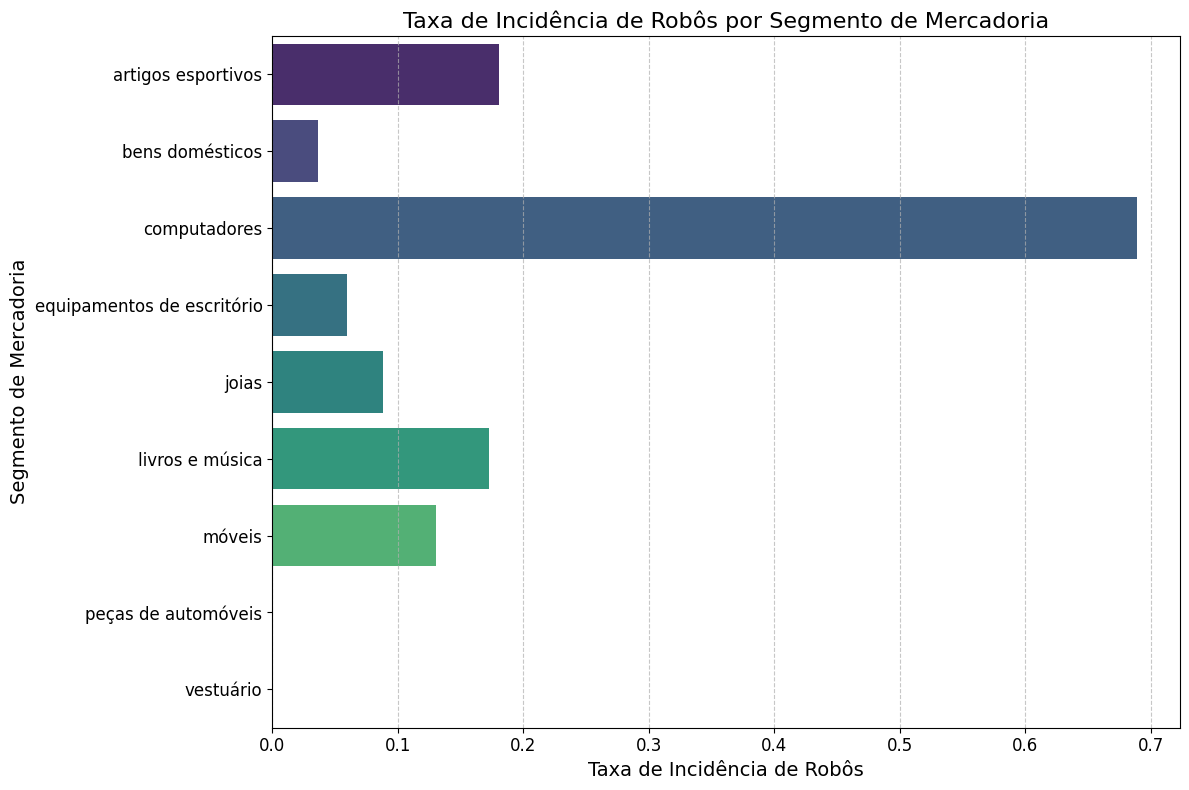

In [156]:
# Plot do Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='resultado', y='mercadoria', data=taxa_incidencia, palette='viridis')

# Adicionar título
plt.title('Taxa de Incidência de Robôs por Segmento de Mercadoria', fontsize=16)
plt.xlabel('Taxa de Incidência de Robôs', fontsize=14)
plt.ylabel('Segmento de Mercadoria', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### 3. Usuários tendem a apresentar mais de um tipo de dispositivo para participação em um mesmo leilão?

- Em média, considerando toda a amostra de dados, temos que 63.68% dos usuários utilizaram mais de um dispositivo. Quando considerado o público da amostra categorizada como robô, esse percentual sobre para 88.57%.

In [159]:
# Considerar o número de dispositivos utilizado em um leilão por participante
dispositivos_usuario = joined_df.groupby(['leilao', 'id_participante'])['dispositivo'].nunique().reset_index()
dispositivos_usuario.columns = ['leilao', 'usuario_id', 'num_dispositivos']

# Percentual dos participantes com +1 dispositivo
mais_de_um_dispositivo = dispositivos_usuario[dispositivos_usuario['num_dispositivos'] > 1]
proporcao_usuarios = mais_de_um_dispositivo['usuario_id'].nunique() / joined_df['id_participante'].nunique()

print(f'Proporção de usuários que utilizaram mais de um dispositivo em pelo menos um leilão: {proporcao_usuarios:.2%}')

Proporção de usuários que utilizaram mais de um dispositivo em pelo menos um leilão: 63.68%


In [158]:
joined_df_robo = joined_df[joined_df['resultado'] == 1]

# Considerar o número de dispositivos utilizado em um leilão por participante
dispositivos_usuario = joined_df_robo.groupby(['leilao', 'id_participante'])['dispositivo'].nunique().reset_index()
dispositivos_usuario.columns = ['leilao', 'usuario_id', 'num_dispositivos']

# Percentual dos participantes com +1 dispositivo
mais_de_um_dispositivo = dispositivos_usuario[dispositivos_usuario['num_dispositivos'] > 1]
proporcao_usuarios = mais_de_um_dispositivo['usuario_id'].nunique() / joined_df_robo['id_participante'].nunique()

print(f'Proporção de usuários que utilizaram mais de um dispositivo: {proporcao_usuarios:.2%}')

Proporção de usuários que utilizaram mais de um dispositivo: 88.57%


### 4. Usuários costumam apresentar uma única conta de pagamento para participação em leilões?

- Apesar de normalmente acessarem os leilões por meio de mais de um dispositivo, não apresentam contas pagamento diferentes.

In [161]:
# Considerar o número de contas utilizado em um leilão por participante
conta_usuario = joined_df.groupby(['leilao', 'id_participante'])['conta_pagamento'].nunique().reset_index()
conta_usuario.columns = ['leilao', 'usuario_id', 'num_contas']

# Percentual dos participantes com +1 conta
mais_de_um_conta = conta_usuario[conta_usuario['num_contas'] > 1]
proporcao_usuarios = mais_de_um_conta['usuario_id'].nunique() / joined_df['id_participante'].nunique()

print(f'Proporção de usuários que utilizaram mais de uma conta pagamento: {proporcao_usuarios:.2%}')

Proporção de usuários que utilizaram mais de uma conta pagamento: 0.00%


### 5. Existe um volume de lances específico que caracteriza um comportamento fraudulento?

- Por meio da observação dos quartis da contagem média de lances por participante, verifica-se que enquanto os 75% dos usuários geral apresentam uma média de até 210 lances; o público limitado aos participantes com lances fraudulentos apresentam média superior aos 2900 lances.

In [162]:
# Média de lances por usuário
contagem_lances = joined_df.groupby(['id_participante'])['id_lance'].count().reset_index()
contagem_lances.columns = ['id_participante', 'contagem_lances']
media_contagem_lances = contagem_lances['contagem_lances'].mean()

print(media_contagem_lances)

1819.3287867910983


In [163]:
contagem_lances.describe()

,contagem_lances
count,1393.000000
mean,1819.328787
std,17332.215395
min,1.000000
25%,3.000000
50%,18.000000
75%,210.000000
max,515033.000000


In [164]:
joined_df_fraude = joined_df[joined_df['resultado'] == 1]

# Media de lances por usuário
contagem_lances_fraude = joined_df_fraude.groupby(['id_participante'])['id_lance'].count().reset_index()
contagem_lances_fraude.columns = ['id_participante', 'contagem_lances']
media_contagem_lances_fraude = contagem_lances_fraude['contagem_lances'].mean()

print(media_contagem_lances_fraude)

4762.8


In [165]:
contagem_lances_fraude.describe()

,contagem_lances
count,70.000000
mean,4762.800000
std,19481.992181
min,1.000000
25%,331.000000
50%,786.500000
75%,2920.250000
max,161935.000000


### 6. Usuários humanos apresentam um tempo de lance diferente dos usuários categorizados como robôs?

Sim.

- A variável tempo está “criptografada”, mas assumindo que as propriedades de ordem e escala relativa foram preservadas, então há uma diferença significativa entre lances de usuários humanos e de robôs.

- Um usuário humano demora, em média, 3 vezes mais entre um lance e outro do que um usuário classificado como robô. Os usuários legítimos também possuem uma mediana 0.5 vezes maior, um desvio-padrão 18 vezes maior e um valor máximo entre um lance e outro 213 vezes maior, o que sugere que, de fato, os usuários humanos tendem a demonstrar um período mais longo entre um lance e outro.


In [119]:
sorted_joined_df = joined_df.sort_values(['id_participante', 'tempo'])
sorted_joined_df.head(10)

,id_lance,id_participante,leilao,mercadoria,dispositivo,tempo,pais,ip,url,pais_extenso,conta_pagamento,endereco,resultado
1739541,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,joias,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3,Brunei,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0
2461487,1436,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone112,9759251421052631,Indonésia,33.205.139.7,vasstdc27m7nks3,Indonésia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461488,18426,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone344,9759302263157894,Índia,77.163.46.135,vasstdc27m7nks3,Índia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461489,34474,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone57,9759345684210526,om,176.186.163.51,vasstdc27m7nks3,Oma,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461490,51389,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone3,9759392526315789,Índia,105.112.118.151,vasstdc27m7nks3,Índia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461491,60863,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone168,9759420368421052,sa,252.34.172.184,vasstdc27m7nks3,Arabia Saudita,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461492,64324,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone76,9759430000000000,bd,31.74.39.140,vasstdc27m7nks3,Bangladesh,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461493,67279,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone168,9759438263157894,sa,36.62.89.36,vasstdc27m7nks3,Arabia Saudita,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461494,74093,01067975436d123f717ee5aba0dd4bbfa0937,61qzn,joias,phone19,9759457052631578,pl,169.166.216.209,vasstdc27m7nks3,Polonia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0
2461495,77208,01067975436d123f717ee5aba0dd4bbfa0937,jefix,joias,phone20,9759465526315789,Índia,213.225.77.188,vasstdc27m7nks3,Índia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0


In [120]:
# Calcula a diferença de tempo relativa entre um lance e outro do mesmo participante
participante_time_diff = sorted_joined_df.groupby('id_participante')[['tempo']].diff()
participante_time_diff.head(10)

,tempo
1739541,NaN
2461487,NaN
2461488,5.084211e+10
2461489,4.342105e+10
2461490,4.684211e+10
2461491,2.784211e+10
2461492,9.631579e+09
2461493,8.263158e+09
2461494,1.878947e+10
2461495,8.473684e+09


In [121]:
sorted_joined_df['participante_time_diff'] = participante_time_diff
diff = sorted_joined_df[['id_participante', 'participante_time_diff']].dropna()
diff.head()

,id_participante,participante_time_diff
2461488,01067975436d123f717ee5aba0dd4bbfa0937,5.084211e+10
2461489,01067975436d123f717ee5aba0dd4bbfa0937,4.342105e+10
2461490,01067975436d123f717ee5aba0dd4bbfa0937,4.684211e+10
2461491,01067975436d123f717ee5aba0dd4bbfa0937,2.784211e+10
2461492,01067975436d123f717ee5aba0dd4bbfa0937,9.631579e+09


In [123]:
bid_intervals = diff.groupby('id_participante')[['participante_time_diff']].describe().reset_index()
bid_intervals = bid_intervals.droplevel(axis=1, level=0)
bid_intervals = bid_intervals.rename(columns = {'': 'id_participante', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
bid_intervals.head()

,id_participante,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,01067975436d123f717ee5aba0dd4bbfa0937,2.507283e+10,5.332895e+10,5.263158e+07,1.405263e+10,9.704211e+11,2.455263e+10
1,012441119bcf83b23d4768bb72cea6d6carua,5.622344e+11,6.775564e+11,1.052632e+08,4.752895e+11,2.583895e+12,6.635395e+11
2,01255c2c7c5578c186873422fc00fd7afwk8k,2.074860e+11,2.719359e+11,5.789474e+08,1.133421e+11,1.459842e+12,2.386842e+11
3,01349288df20199905e719f0ff7ee771nwryj,1.909924e+11,3.704528e+11,1.578947e+08,4.573684e+10,1.872895e+12,1.352105e+11
4,0141844fc725a85e38e12cc02fcdbbe8ofqxv,7.225108e+11,7.738531e+11,2.526316e+09,5.631053e+11,2.348053e+12,1.010421e+12


In [124]:
merged_df = joined_df.copy()
merged_df = merged_df.merge(bid_intervals, on='id_participante', how='inner')
merged_df.head()

,id_lance,id_participante,leilao,mercadoria,dispositivo,tempo,pais,ip,url,pais_extenso,conta_pagamento,endereco,resultado,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,artigos esportivos,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is,Republica Tcheca,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0,1.655089e+09,2.314671e+11,0.0,210526316.0,5.002347e+13,421052634.0
1,2351247,76218e14c379c12d599dae9e1c00b61a3i5b2,fwxlx,artigos esportivos,phone53,9631917052631578,lk,211.105.123.139,dxfwoh0cow9bre6,Sri Lanka,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0,1.655089e+09,2.314671e+11,0.0,210526316.0,5.002347e+13,421052634.0
2,2351264,76218e14c379c12d599dae9e1c00b61a3i5b2,9u5up,artigos esportivos,phone4,9631917105263157,ke,84.83.169.15,vasstdc27m7nks3,Quenia,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0,1.655089e+09,2.314671e+11,0.0,210526316.0,5.002347e+13,421052634.0
3,2351313,76218e14c379c12d599dae9e1c00b61a3i5b2,7us95,artigos esportivos,phone159,9631917315789473,et,204.38.26.113,jolczadwyrlkj95,Etiopia,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0,1.655089e+09,2.314671e+11,0.0,210526316.0,5.002347e+13,421052634.0
4,2351331,76218e14c379c12d599dae9e1c00b61a3i5b2,9u5up,artigos esportivos,phone4,9631917368421052,ke,177.14.78.147,vasstdc27m7nks3,Quenia,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0,1.655089e+09,2.314671e+11,0.0,210526316.0,5.002347e+13,421052634.0


In [134]:
merged_df["mean_diff"].describe()

count    2.534119e+06
mean     1.902374e+10
std      3.587933e+11
min      7.084343e+07
25%      1.500979e+08
50%      4.773865e+08
75%      3.578545e+09
max      7.610295e+13
Name: mean_diff, dtype: float64

In [132]:
resumo = merged_df.groupby(["resultado"])["mean_diff"].agg(["mean", "median", "std", "min", "max","count"])
resumo

,mean,median,std,min,max,count
resultado,,,,,,
0,2.088709e+10,3.269927e+08,3.848960e+11,7.084343e+07,7.610295e+13,2200726
1,6.723833e+09,6.499312e+08,2.043842e+10,4.773865e+08,3.566384e+11,333393


In [133]:
ratio_df = pd.DataFrame()

for col in resumo.columns:
  ratio = resumo[col][0] / resumo[col][1]
  ratio_df[col] = [ratio]

ratio_df

,mean,median,std,min,max,count
0,3.106425,0.503119,18.83198,0.148398,213.38966,6.600996


### 7. Existem URLs de leilões mais suscetíveis a fraudes?

Sim.

- Cerca de 8% dos URLs possuem 100% (43.107) de incidência de fraude. Desse último valor, 84% correspondem a URLs que foram utilizadas somente uma vez.

- A média de vezes que essas URLs foram utilizadas é de 1.8, mas o desvio padrão é de 10. Isso ocorre pois algumas URLs tiveram centenas de lances fraudulentos.

- O caso mais absurdo foi de uma URL com 937 lances fraudulentos, realizados por somente 2 usuários e em leilões diferentes.


In [110]:
fraudes_por_url = joined_df.groupby('url')['resultado'].agg(['mean', 'count']).reset_index()

fraudes_por_url = fraudes_por_url.sort_values(by=["mean", "count"], ascending=[False, False])

print(fraudes_por_url)

                    url  mean  count
268143  hzsvpefhf94rnlb   1.0    937
126265  8golk6oetcgd6wm   1.0    737
60188   41hbwy7lobmyerr   1.0    656
337771  mp0g18rqmfrqctc   1.0    631
337290  mnq94u1xp9s57wi   1.0    454
...                 ...   ...    ...
535951  zzznr486avu6j16   0.0      1
535952  zzzu8volyhiy1dy   0.0      1
535953  zzzuhuuxk6klj2m   0.0      1
535954  zzzuoe622xe4qlf   0.0      1
535956  zzzyacx97kqgj9i   0.0      1

[535957 rows x 3 columns]


In [111]:
print(fraudes_por_url[fraudes_por_url["mean"] == 1.0].iloc[0:10])

                    url  mean  count
268143  hzsvpefhf94rnlb   1.0    937
126265  8golk6oetcgd6wm   1.0    737
60188   41hbwy7lobmyerr   1.0    656
337771  mp0g18rqmfrqctc   1.0    631
337290  mnq94u1xp9s57wi   1.0    454
311322  kwhc56qjct4qg25   1.0    446
119018  7zbmlboz9l3edcc   1.0    388
512830  yg9658cm4p7ekzd   1.0    341
199209  ddfouag9ucjw0rl   1.0    329
394249  qhex76rfizw1kkb   1.0    312


In [112]:
print(fraudes_por_url[(fraudes_por_url["mean"] == 1.0) & (fraudes_por_url["count"] > 1)])

                    url  mean  count
268143  hzsvpefhf94rnlb   1.0    937
126265  8golk6oetcgd6wm   1.0    737
60188   41hbwy7lobmyerr   1.0    656
337771  mp0g18rqmfrqctc   1.0    631
337290  mnq94u1xp9s57wi   1.0    454
...                 ...   ...    ...
535236  zyc2x9czgyz7h4p   1.0      2
535412  zyr7qknex0438un   1.0      2
535552  zz34ns2wtjwi4tx   1.0      2
535737  zzhfm6ev72ustat   1.0      2
535841  zzq5jb6brkfpgga   1.0      2

[6872 rows x 3 columns]


In [109]:
print(fraudes_por_url[(fraudes_por_url["mean"] == 1.0) & (fraudes_por_url["count"] == 1)])

                    url  mean  count
42      003w8c5j0rf0i7u   1.0      1
45      0043gs2nh828vfg   1.0      1
66      00613g57m6nmrn4   1.0      1
77      006x9i7nzikmspr   1.0      1
98      009d8q0dxphyqj6   1.0      1
...                 ...   ...    ...
535900  zzv9dzbb4i8sgf7   1.0      1
535908  zzvworlix07k6ip   1.0      1
535939  zzyowjlw6av8c48   1.0      1
535941  zzyxcqfy4pgg6cw   1.0      1
535944  zzz5ovdne795icm   1.0      1

[36235 rows x 3 columns]


In [113]:
fraudes_por_url[fraudes_por_url["mean"] == 1.0]['count'].describe()

count    43107.000000
mean         1.876122
std         10.256535
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        937.000000
Name: count, dtype: float64

### 8. Um usuário fraudulento tende a fazer mais lances do que um usuário legítimo?

Sim.

- Em média, a quantidade máxima de lances de um usuário fraudulento é 5,7 vezes maior que a de um usuário humano, e a mediana 40 vezes maior.

- As fraudes são realizadas por poucos usuários, mas em geral eles possuem um comportamento bem agressivo em termos de quantidade de lances por leilão. O robô quer ganhar o leilão, então ele irá realizar a quantidade de lances que for necessário para ganhar.


In [136]:
max_bids = lances.groupby(['id_participante', 'leilao']).count().reset_index()[['id_participante', 'leilao', 'id_lance']].rename(columns = {'id_lance': 'max_bids'})
max_bids = max_bids[['id_participante', 'max_bids']].groupby('id_participante').max().reset_index()
max_bids.head()

,id_participante,max_bids
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3


In [137]:
max_bids_merged = max_bids.merge(merged_df, on='id_participante', how='inner').fillna(0)
max_bids_merged.head()

,id_participante,max_bids,id_lance,leilao,mercadoria,dispositivo,tempo,pais,ip,url,pais_extenso,conta_pagamento,endereco,resultado,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,01067975436d123f717ee5aba0dd4bbfa0937,520,1436,jefix,joias,phone112,9759251421052631,Indonésia,33.205.139.7,vasstdc27m7nks3,Indonésia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0,2.507283e+10,5.332895e+10,52631578.0,1.405263e+10,9.704211e+11,2.455263e+10
1,01067975436d123f717ee5aba0dd4bbfa0937,520,18426,jefix,joias,phone344,9759302263157894,Índia,77.163.46.135,vasstdc27m7nks3,Índia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0,2.507283e+10,5.332895e+10,52631578.0,1.405263e+10,9.704211e+11,2.455263e+10
2,01067975436d123f717ee5aba0dd4bbfa0937,520,34474,jefix,joias,phone57,9759345684210526,om,176.186.163.51,vasstdc27m7nks3,Oma,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0,2.507283e+10,5.332895e+10,52631578.0,1.405263e+10,9.704211e+11,2.455263e+10
3,01067975436d123f717ee5aba0dd4bbfa0937,520,51389,jefix,joias,phone3,9759392526315789,Índia,105.112.118.151,vasstdc27m7nks3,Índia,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0,2.507283e+10,5.332895e+10,52631578.0,1.405263e+10,9.704211e+11,2.455263e+10
4,01067975436d123f717ee5aba0dd4bbfa0937,520,60863,jefix,joias,phone168,9759420368421052,sa,252.34.172.184,vasstdc27m7nks3,Arabia Saudita,a3d2de7675556553a5f08e4c88d2c228d0upt,ca7ebbf817ced6e7194200eb690eda41u4mda,0,2.507283e+10,5.332895e+10,52631578.0,1.405263e+10,9.704211e+11,2.455263e+10


In [141]:
max = max_bids_merged.groupby(["id_participante"])["max_bids"].max()
max = pd.DataFrame({'id_participante': max.index, 'max_bids': max.values})

resultado = max_bids_merged[["id_participante", "resultado"]]

max = max.merge(resultado, on='id_participante', how='left').fillna(0).drop_duplicates()

max.head()

,id_participante,max_bids,resultado
0,01067975436d123f717ee5aba0dd4bbfa0937,520,0
543,012441119bcf83b23d4768bb72cea6d6carua,4,0
566,01255c2c7c5578c186873422fc00fd7afwk8k,48,0
631,01349288df20199905e719f0ff7ee771nwryj,9,0
701,0141844fc725a85e38e12cc02fcdbbe8ofqxv,4,0


In [142]:
max.describe()

,max_bids,resultado
count,1187.000000,1187.000000
mean,301.989048,0.056445
std,2243.904853,0.230876
min,1.000000,0.000000
25%,2.000000,0.000000
50%,6.000000,0.000000
75%,55.000000,0.000000
max,62485.000000,1.000000


In [144]:
teste = max.groupby(["resultado"])["max_bids"].agg(["mean", "median", "std", "min", "max","count"])
teste

,mean,median,std,min,max,count
resultado,,,,,,
0,238.259821,5.0,1352.224088,1,25532,1120
1,1367.313433,203.0,7632.613860,6,62485,67


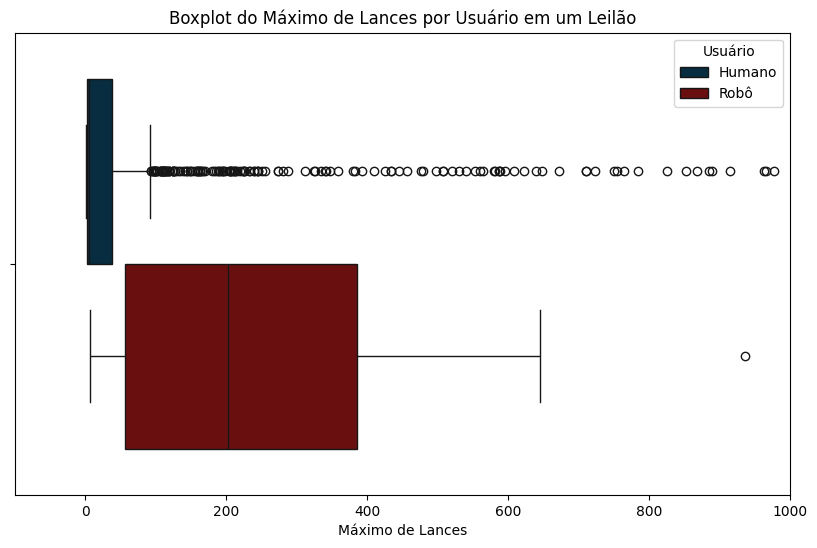

In [146]:
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=max, x='max_bids', hue='resultado', palette=["#003049", "#780000"])
plt.title('Boxplot do Máximo de Lances por Usuário em um Leilão')
plt.xlabel('Máximo de Lances')
plt.xlim(-100, 1000)

handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Humano', 'Robô'], title='Usuário')

plt.show()

In [147]:
data = max["max_bids"]

# Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calcular o IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Calcular a percentagem de outliers
percent_outliers = (len(outliers) / len(data)) * 100

# Mostrar os resultados
print(f"Total de dados: {len(data)}")
print(f"Total de outliers: {len(outliers)}")
print(f"Percentagem de outliers: {percent_outliers:.2f}%")

Total de dados: 1187
Total de outliers: 201
Percentagem de outliers: 16.93%


### 9. Existe alguma relação entre o dispositivo usado e a incidência de fraudes?

- Alguns dispositivos possuem 100% de incidência de fraude (513). Porém, em geral, foram usados poucas vezes e por poucos usuários.

- A média é de 23% de incidência de fraude por modelo de dispositivo. Por outro lado, a mediana é de 1.7%, o que indica que a média é fortemente influenciada por outliers. Podemos confirmar isso olhando para o desvio padrão de 36% e para os quase 10% de dispositivos com 100% de lances fraudulentos.

- Para testar se há uma associação ou dependência entre o tipo de dispositivo usado e a ocorrência de fraudes usaremos o teste qui-quadrado. O teste qui-quadrado de independência testa a hipótese nula de que as duas variáveis são independentes.

- Para um teste com grau de significância de 5%, o Estatístico Qui-Quadrado obtido foi de 993981 e o P-valor < 0.05, com 5392 graus de liberdade.

- Portanto, rejeitamos a hipótese nula, isto é, acreditamos que existe uma relação significativa entre o modelo do dispositivo e a incidência de fraudes.

- Como o tamanho da amostra é relativamente grande, o teste pode ter captado diferenças muito pequenas que são estatisticamente significativas, mas não necessariamente significativas do ponto de vista prático. Para avaliar a magnitude da associação, calculamos o tamanho do efeito (V de Cramer) e obtivemos 0.62 como resultado, o que sugere de fato uma forte associação.


In [150]:
summary = joined_df.groupby('dispositivo')['resultado'].agg(['count', 'sum'])
summary.columns = ['total_lances', 'lances_fraudulentos']
summary['percent_fraudulentos'] = summary['lances_fraudulentos'] / summary['total_lances'] * 100
summary.reset_index(inplace=True)
print(summary)

     dispositivo  total_lances  lances_fraudulentos  percent_fraudulentos
0         phone0         19261                  179              0.929339
1         phone1          6650                  389              5.849624
2        phone10           225                    6              2.666667
3       phone100            55                    0              0.000000
4      phone1000            59                    0              0.000000
...          ...           ...                  ...                   ...
5388    phone995            23                    0              0.000000
5389    phone996           515                  135             26.213592
5390    phone997           149                    3              2.013423
5391    phone998             2                    0              0.000000
5392    phone999           307                    5              1.628664

[5393 rows x 4 columns]


In [151]:
desc_stats = summary['percent_fraudulentos'].describe()
print(desc_stats)

count    5393.000000
mean       23.299010
std        36.145299
min         0.000000
25%         0.000000
50%         1.709402
75%        37.500000
max       100.000000
Name: percent_fraudulentos, dtype: float64


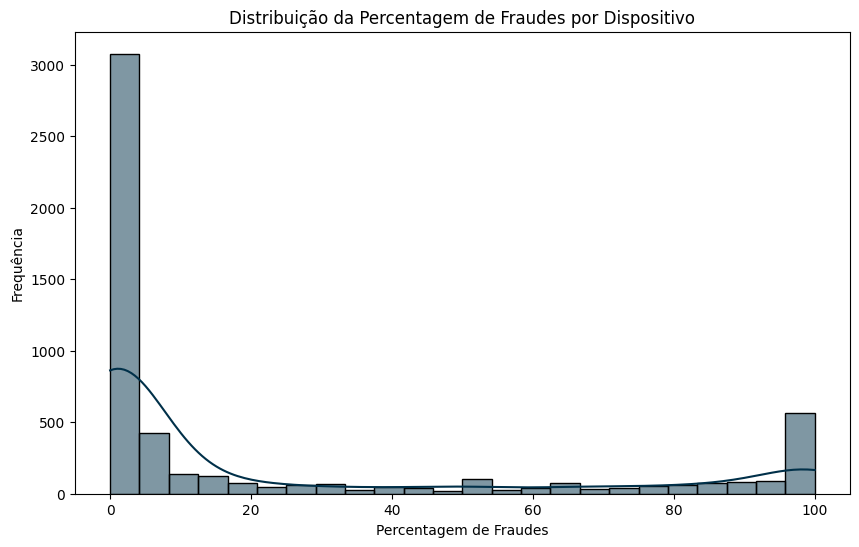

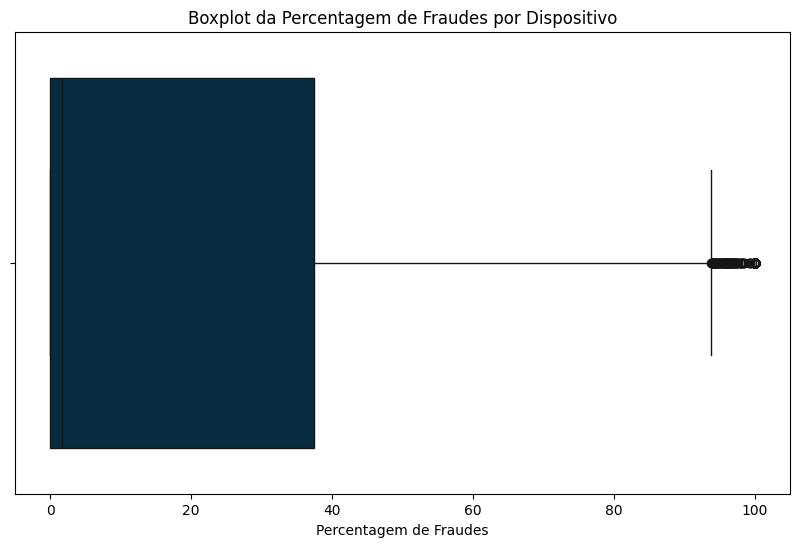

In [152]:
# Histograma da percentagem de fraudes por dispositivo
plt.figure(figsize=(10, 6))
sns.histplot(summary['percent_fraudulentos'], kde=True, color="#003049")
plt.title('Distribuição da Percentagem de Fraudes por Dispositivo')
plt.xlabel('Percentagem de Fraudes')
plt.ylabel('Frequência')
plt.show()

# Boxplot para visualizar a variação
plt.figure(figsize=(10, 6))
sns.boxplot(x=summary['percent_fraudulentos'], color="#003049")
plt.title('Boxplot da Percentagem de Fraudes por Dispositivo')
plt.xlabel('Percentagem de Fraudes')
plt.show()

In [154]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(joined_df['dispositivo'], joined_df['resultado'])

# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Estatístico Qui-Quadrado: {chi2}")
print(f"P-valor: {p:.5f}")
print(f"Graus de Liberdade: {dof}")

# V de Cramer
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

if p < 0.05:
    print("Rejeitamos a hipótese nula. Existe uma relação significativa entre o dispositivo e a incidência de fraudes.")
    print(f"O tamanho do efeito (V de Cramer) é: {cramer_v}")
else:
    print("Não rejeitamos a hipótese nula. Não existe uma relação significativa entre o dispositivo e a incidência de fraudes.")

Estatístico Qui-Quadrado: 993981.1408850672
P-valor: 0.00000
Graus de Liberdade: 5392
Rejeitamos a hipótese nula. Existe uma relação significativa entre o dispositivo e a incidência de fraudes.
O tamanho do efeito (V de Cramer) é: 0.6262646789431187


### 10. Qual é a taxa geral de fraudes nos leilões?

- Cerca de 13% dos lances foram realizados por usuários detectados como robô. Por outro lado, cerca de 5% dos usuários conhecidos foram diagnosticados como robô.

In [148]:
joined_df["resultado"].value_counts(normalize=True)

resultado
0    0.868448
1    0.131552
Name: proportion, dtype: float64

In [149]:
unique_robot_count = joined_df[joined_df['resultado'] == 1]['id_participante'].nunique()
unique_human_count = joined_df[joined_df['resultado'] == 0]['id_participante'].nunique()
unique_total = joined_df["id_participante"].nunique()

print(f"Porcentagem de fraude para usuários únicos")
print(f"Humanos: {unique_human_count} ({100*unique_human_count/unique_total:.2f}%)")
print(f"Robôs: {unique_robot_count} ({100*unique_robot_count/unique_total:.2f}%)")

Porcentagem de fraude para usuários únicos
Humanos: 1323 (94.97%)
Robôs: 70 (5.03%)
